# My first Jupyter Notebook


#### Note from future Armin:
---
In this notebook, I worked through the Ebook "[Data Science Projects with Python](https://www.amazon.com/gp/product/1838551026)" from Stephen Klosterman under packt Publishing.
This was my first ever jupyter notebook, so here I get familiar with general commands and the pandas module.
Since his notebook containing the same code is [publicly available](https://github.com/TrainingByPackt/Data-Science-Projects-with-Python), I feel at ease posting my "working along" version here.

Summary
---
* Reading in and saving data
* Playing around with pandas dataframes
* Creating "boolean masks"
* Cleaning the data
* Visualizing the data
* One-hot-encoding categorical features



---
This is a markdown cell. Press __esc__ to enter command mode, then press __m__ to enter markdown mode.
__bold__ and *italics*
`code`
Shift + Enter to render a markdown cell
switch from markdown mode to code cell by pressing y in command mode

In [1]:
import matplotlib as mpl
# ^^^ pyforest auto-imports - don't write above this line
# Importing pandas, a package for data analysis in Python
import pandas as pd

In [2]:
# Reading in data from the given file path
pd.read_excel('.\Data\default_of_credit_card_clients__courseware_version_1_21_19.xls')

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,ecff42d0-bdc6,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,99d1fa0e-222b,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,95cdd3e7-4f24,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,00d03f02-04cd,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [3]:
# save data as a pandas DataFrame
df_one = pd.read_excel('.\Data\default_of_credit_card_clients__courseware_version_1_21_19.xls')

In [4]:
# basic commands to identify DataFrame characteristics
df_one.shape
df_one.info()
df_one.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  int64 
 3   EDUCATION                   30000 non-null  int64 
 4   MARRIAGE                    30000 non-null  int64 
 5   AGE                         30000 non-null  int64 
 6   PAY_1                       30000 non-null  object
 7   PAY_2                       30000 non-null  int64 
 8   PAY_3                       30000 non-null  int64 
 9   PAY_4                       30000 non-null  int64 
 10  PAY_5                       30000 non-null  int64 
 11  PAY_6                       30000 non-null  int64 
 12  BILL_AMT1                   30000 non-null  int64 
 13  BILL_AMT2                   30000 non-null  in

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Some playing around with data
switching gender category from '1' and '2' to '0' and '1'

In [5]:
# for person in df_one[]

In [6]:
df_one.columns # shows all column indeces

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [7]:
df_one['ID'].nunique() # shows unique values. It' slightly less than the length of the DataFrame: some IDs are not unique??

29687

In [8]:
id_counts = df_one['ID'].value_counts() # -> From df_one, take column 'ID' and apply the method value_counts() -> 
# id_counts now contains every ID, and the number of times this ID is present.
id_counts.head() # shows the first 5 values of id_counts by default -> some have 2 occurances!

ad23fe5c-7b09    2
1fb3e3e6-a68d    2
89f8f447-fca8    2
7c9b7473-cc2f    2
90330d02-82d9    2
Name: ID, dtype: int64

In [9]:
id_counts.value_counts()

1    29374
2      313
Name: ID, dtype: int64

## Creating 'boolean masks'
... aka logical mask, filtering an array by some condition.

### Some 'synthetic data'
Learning how to create a boolean mask on a random numpy array

In [41]:
# importing the numpy package, obligatory for large calculations and array manipulation
import numpy as np 

In [42]:
np.random.seed(seed=24) # for reproducability

In [43]:
rand_int = np.random.randint(low=1, high=5, size=100) # produces 100 numbers from 1 (inclusive) to 5 (exclusive)

In [44]:
rand_int

array([3, 4, 1, 4, 2, 2, 2, 1, 4, 4, 1, 4, 4, 3, 4, 4, 4, 4, 4, 4, 2, 3,
       4, 4, 2, 4, 2, 4, 1, 1, 3, 1, 4, 2, 2, 1, 4, 3, 2, 2, 3, 3, 2, 3,
       4, 2, 3, 4, 1, 3, 4, 2, 2, 4, 1, 2, 3, 3, 2, 1, 2, 4, 2, 1, 4, 3,
       1, 2, 1, 3, 4, 2, 3, 4, 1, 3, 2, 1, 1, 3, 3, 4, 3, 2, 4, 1, 4, 4,
       4, 4, 1, 4, 3, 2, 4, 4, 3, 3, 2, 4])

In [45]:
#rand_int == 3 goes through the array value by value, and returns False if the value is not 3, and True if it is
rand_equal_3 = rand_int == 3 
rand_equal_3 # That's now a boolean mask!

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False,  True, False, False,  True,  True, False,  True, False,
       False,  True, False, False,  True, False, False, False, False,
       False, False,  True,  True, False, False, False, False, False,
       False, False,  True, False, False, False,  True, False, False,
        True, False, False,  True, False, False, False,  True,  True,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False, False,  True,  True, False,
       False])

In [46]:
sum(rand_equal_3) # Because the value "True" is encoded(?) as "1", the sum() function returns the number of 3's in rand_int

22

In [47]:
rand_int[rand_equal_3] # returns only those positions, where the boolean mask is true (ie only 3's)

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

### Data Integrity Verification
applying to data

In [48]:
dupe_mask = id_counts == 2 
dupe_mask.head()

ad23fe5c-7b09    True
1fb3e3e6-a68d    True
89f8f447-fca8    True
7c9b7473-cc2f    True
90330d02-82d9    True
Name: ID, dtype: bool

#### Accessing Index of id_counts

In [49]:
id_counts.index

Index(['ad23fe5c-7b09', '1fb3e3e6-a68d', '89f8f447-fca8', '7c9b7473-cc2f',
       '90330d02-82d9', '2a793ecf-05c6', '75938fec-e5ec', '7be61027-a493',
       'a3a5c0fc-fdd6', 'b44b81b2-7789',
       ...
       'ed32d9fa-fc4d', '0d3c491a-f31a', '43b86f14-5293', '9aea1c3d-6a89',
       'eecd60d0-e496', '2edeb3a6-d38d', '27e11893-92e9', '2b1c282b-441e',
       'bd737997-0eb0', '15d69f9f-5ad3'],
      dtype='object', length=29687)

In [50]:
dupe_ids = id_counts.index[dupe_mask] # This selects only those IDs where the boolean mask contains a "True" value
dupe_ids

Index(['ad23fe5c-7b09', '1fb3e3e6-a68d', '89f8f447-fca8', '7c9b7473-cc2f',
       '90330d02-82d9', '2a793ecf-05c6', '75938fec-e5ec', '7be61027-a493',
       'a3a5c0fc-fdd6', 'b44b81b2-7789',
       ...
       '4f249cbc-5e9c', '40e75290-0f59', 'fc73f07e-eb96', '2a8ad33f-fa9c',
       'cdae2be5-8ec4', 'c69162db-4864', '73ea498f-44b2', '327d06d5-ce7f',
       'd13465a5-a9e0', '841ae407-dc4c'],
      dtype='object', length=313)

In [51]:
dupe_ids = list(dupe_ids)
len(dupe_ids) # 313 ids that occur twice, checks out

313

In [52]:
# .loc[] is a different way of accessing a dataframe
# It has different use cases from data_frame["column"][index] (something to do with reading vs writing(?))
df_one.loc[df_one['ID'].isin(dupe_ids[0:3])].head(10) 
# accesses df_one if the index is in the first three ids of the "dupe_ids" dataframe
# because they are duplicate, shows 6 rows. (Even though head(10) should show 10 rows)

# This shows one row that makes sense, and one where all values are 0
# Rows where everything is 0 should be deleted (age of 0 does not make sense)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
5033,89f8f447-fca8,320000,2,2,1,32,0,0,0,0,...,169371,172868,150827,8000,8000,5500,6100,6000,5000,0
5133,89f8f447-fca8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16727,1fb3e3e6-a68d,80000,1,2,2,33,2,2,0,0,...,27394,29922,31879,0,2000,2000,3000,2600,0,1
16827,1fb3e3e6-a68d,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29685,ad23fe5c-7b09,50000,1,3,1,32,0,0,0,0,...,12882,8131,3983,3000,2871,1000,163,3983,3771,1
29785,ad23fe5c-7b09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
df_zero_mask = df_one == 0 # creating a boolean mask with "True" values wherever the value of df_one is "0"
df_zero_mask

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,True,True,True,True,False
1,False,False,False,False,False,False,False,False,True,True,...,False,False,False,True,False,False,False,True,False,False
2,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,True
29996,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,True,True
29997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False


The first time, I didn't properly understand what this next cell does:
in short, it returns a boolean mask that is True whenever all the *feature* values (in this case meaning all columns except ID) are 0. It takes the previously created "df_zero_mask". it *slices* like this `[:, 1:]`, meaning "all rows (from 0:end) and all except the first column (from 1:end).
axis=1 is required, because axis=0 (the default) would return *columns* where every value is true. But we want *rows*

In [54]:
feature_zero_mask = df_zero_mask.iloc[:, 1:].all(axis=1)
print(feature_zero_mask)
sum(feature_zero_mask) # thats 315 entries, as compared to the 313 times there were duplicate IDs

0        False
1        False
2        False
3        False
4        False
         ...  
29995    False
29996    False
29997    False
29998    False
29999    False
Length: 30000, dtype: bool


315

In [55]:
# only keep the rows where the condition is *not* true -> ~
# .copy() so that basically a new df is created, instead of referencing the old one
df_clean_1 = df_one.loc[~feature_zero_mask, :].copy()

In [56]:
df_clean_1.shape

(29685, 25)

In [57]:
df_clean_1['ID'].nunique() # checking if it worked, yes it did

29685

In [58]:
df_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29685 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          29685 non-null  object
 1   LIMIT_BAL                   29685 non-null  int64 
 2   SEX                         29685 non-null  int64 
 3   EDUCATION                   29685 non-null  int64 
 4   MARRIAGE                    29685 non-null  int64 
 5   AGE                         29685 non-null  int64 
 6   PAY_1                       29685 non-null  object
 7   PAY_2                       29685 non-null  int64 
 8   PAY_3                       29685 non-null  int64 
 9   PAY_4                       29685 non-null  int64 
 10  PAY_5                       29685 non-null  int64 
 11  PAY_6                       29685 non-null  int64 
 12  BILL_AMT1                   29685 non-null  int64 
 13  BILL_AMT2                   29685 non-null  in

### Exploring and cleaning more of the data

In [59]:
df_clean_1['PAY_1'].head(5)

0     2
1    -1
2     0
3     0
4    -1
Name: PAY_1, dtype: object

In [60]:
df_clean_1['PAY_1'].value_counts() # what kinds of values does the "PAY_1" column have?

0                13087
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
Name: PAY_1, dtype: int64

In [67]:
#valid_pay_1_mask = df_clean_1['PAY_1'] != 'Not available' # boolean mask where PAY_1 is not 'Not available'
#valid_pay_1_mask[0:5]
# above is a version of indexing that will be deprecated in the future. pandas recommends using the "series.iloc[]" 
# or series.loc[] methods, depending on wanted behaviour (to my understanding, differences between .loc and .iloc only 
# occur when the indeces are out of order)

valid_pay_1_mask = df_clean_1["PAY_1"] != "Not available"
valid_pay_1_mask.loc[0:5], valid_pay_1_mask.iloc[0:5] # in this case, loc and iloc outputs the same

(0    True
 1    True
 2    True
 3    True
 4    True
 5    True
 Name: PAY_1, dtype: bool,
 0    True
 1    True
 2    True
 3    True
 4    True
 Name: PAY_1, dtype: bool)

In [68]:
sum(valid_pay_1_mask)

26664

In [71]:
df_clean_2 = df_clean_1.loc[valid_pay_1_mask, :].copy() # applying boolean mask and copying

In [75]:
df_clean_2.shape, df_clean_2[['PAY_1', 'PAY_2']].info(), \
df_clean_2['PAY_1'].value_counts() # "PAY_1" column has the datatype "Object"

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26664 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   PAY_1   26664 non-null  object
 1   PAY_2   26664 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 624.9+ KB


((26664, 25),
 None,
  0    13087
 -1     5047
  1     3261
 -2     2476
  2     2378
  3      292
  4       63
  5       23
  8       17
  6       11
  7        9
 Name: PAY_1, dtype: int64)

In [76]:
df_clean_2['PAY_1'] = df_clean_2['PAY_1'].astype('int64') # turning datatype into int64
df_clean_2[['PAY_1', 'PAY_2']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26664 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PAY_1   26664 non-null  int64
 1   PAY_2   26664 non-null  int64
dtypes: int64(2)
memory usage: 624.9 KB


## Matplotlib and data visualization

In [36]:
import matplotlib as mpl #additional plotting functionality

In [81]:
import matplotlib.pyplot as plt #import plotting package
#render plotting automatically
%matplotlib inline

#mpl.rcParams['figure.dpi'] = 400 #high resolution figures
mpl.rcParams['figure.dpi'] = 100

<IPython.core.display.Javascript object>

array([[<AxesSubplot: title={'center': 'LIMIT_BAL'}>,
        <AxesSubplot: title={'center': 'AGE'}>]], dtype=object)

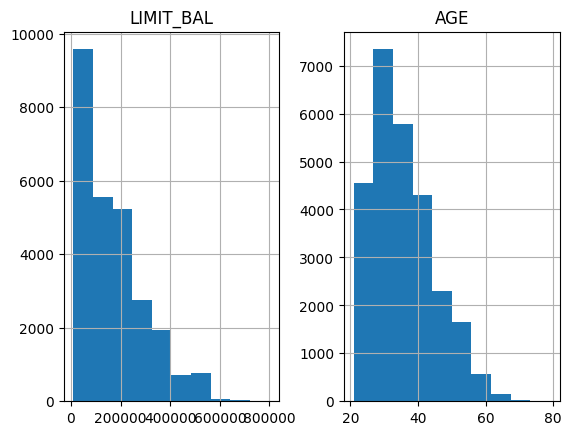

In [82]:
df_clean_2[['LIMIT_BAL', 'AGE']].hist() # simple way to plot a histogram

In [39]:
df_clean_2[['LIMIT_BAL', 'AGE']].describe()

,LIMIT_BAL,AGE
count,26664.000000,26664.000000
mean,167919.054905,35.505213
std,129839.453081,9.227442
min,10000.000000,21.000000
25%,50000.000000,28.000000
50%,140000.000000,34.000000
75%,240000.000000,41.000000
max,800000.000000,79.000000


In [40]:
df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
5      245
4      115
6       43
0       11
Name: EDUCATION, dtype: int64

---

taking a look at original data description: 1 = graduate school; 2 = university; 3 = high school; 4 = others

unknown categories 5, 6, 0 can be assigned to "others" as well, using the .replace() function

---

In [87]:
df_clean_2['EDUCATION'].replace(to_replace=[0, 5, 6], value = 4, inplace = True) # inplace ensures no new df is created
df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
4      414
Name: EDUCATION, dtype: int64

In [89]:
df_clean_2['MARRIAGE'].value_counts() # same here, 0 is not documented, so lum it together with 3 (others)

2    14158
1    12172
3      286
0       48
Name: MARRIAGE, dtype: int64

In [90]:
df_clean_2['MARRIAGE'].replace(to_replace = 0, value = 3, inplace = True)
df_clean_2['MARRIAGE'].value_counts()

2    14158
1    12172
3      334
Name: MARRIAGE, dtype: int64

In [92]:
df_clean_2.groupby('EDUCATION').agg({'default payment next month':'mean'})
# using the .groupby() and .agg methods 
# .groupby("EDUCATION") collects all the rows and groups those where EDUCATION has the same value. 
# .agg will then use the mean of "default payment next month" for each of those groups 

,default payment next month
EDUCATION,
1,0.193901
2,0.235913
3,0.255479
4,0.074879


Text(0.5, 0, 'Education level: ordinal encoding')

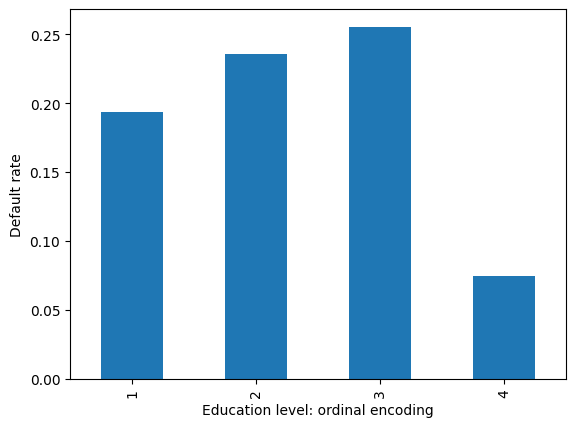

In [93]:
df_clean_2.groupby('EDUCATION').agg({'default payment next month':'mean'}).plot.bar(legend=False) 
plt.ylabel('Default rate')
plt.xlabel('Education level: ordinal encoding')

### Turning ordinal (numbered) labels of Education into categorical values

In [45]:
df_clean_2['EDUCATION_CAT'] = 'none'

In [46]:
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,none
1,2,none
2,2,none
3,2,none
4,2,none
5,1,none
6,1,none
7,2,none
8,3,none
9,3,none


#### creating a dictionary for mapping categories onto values

In [95]:
cat_mapping = {
    1: "graduate school",
    2: "university",
    3: "high school",
    4: "others"
}

In [96]:
df_clean_2['EDUCATION_CAT'] = df_clean_2['EDUCATION'].map(cat_mapping)
df_clean_2['EDUCATION_CAT'].head(10)

0         university
1         university
2         university
3         university
4         university
5    graduate school
6    graduate school
7         university
8        high school
9        high school
Name: EDUCATION_CAT, dtype: object

### creating dummy variables for use in the OHE (one-hot encoding) method

one-hot-encoding simply means that a categroical feature gets split into as many columns as there are categories.
If an item is part of one category, it gets a "1" in that column and a "0" in the corresponding other columns. See below

In [97]:
# pd.get_dummies simply takes the DataFrame and returns the given columns as one-hot-encoded
edu_ohe = pd.get_dummies(df_clean_2['EDUCATION_CAT']) 

In [98]:
edu_ohe.head(20)

,graduate school,high school,others,university
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
5,1,0,0,0
6,1,0,0,0
7,0,0,0,1
8,0,1,0,0
9,0,1,0,0


In [99]:
df_with_ohe = pd.concat([df_clean_2, edu_ohe], axis = 1)
df_with_ohe[['EDUCATION_CAT', 'graduate school', 'high school', 'university', 'others']].head(10)

,EDUCATION_CAT,graduate school,high school,university,others
0,university,0,0,1,0
1,university,0,0,1,0
2,university,0,0,1,0
3,university,0,0,1,0
4,university,0,0,1,0
5,graduate school,1,0,0,0
6,graduate school,1,0,0,0
7,university,0,0,1,0
8,high school,0,1,0,0
9,high school,0,1,0,0


In [100]:
# saving the cleaned data to csv. Index=False is important, because otherwise a new index column is created every time
df_with_ohe.to_csv('.\Data\Chapter_1_cleaned_data.csv', index=False) 

### Exploring the Financial History Features in the Dataset

In [101]:
df = pd.read_csv('.\Data\Chapter_1_cleaned_data.csv')

In [102]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26659,ecff42d0-bdc6,220000,1,3,1,39,0,0,0,0,...,5003,3047,5000,1000,0,high school,0,1,0,0
26660,99d1fa0e-222b,150000,1,3,2,43,-1,-1,-1,-1,...,8998,129,0,0,0,high school,0,1,0,0
26661,95cdd3e7-4f24,30000,1,2,2,37,4,3,2,-1,...,22000,4200,2000,3100,1,university,0,0,0,1
26662,00d03f02-04cd,80000,1,3,1,41,1,-1,0,0,...,1178,1926,52964,1804,1,high school,0,1,0,0


In [103]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'EDUCATION_CAT', 'graduate school',
       'high school', 'others', 'university'],
      dtype='object')

In [104]:
pay_feats = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [105]:
df[pay_feats].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,-0.017777,-0.133363,-0.167679,-0.225023,-0.269764,-0.293579
std,1.126769,1.198640,1.199165,1.167897,1.131735,1.150229
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [106]:
df[pay_feats[0]].value_counts()

 0    13087
-1     5047
 1     3261
-2     2476
 2     2378
 3      292
 4       63
 5       23
 8       17
 6       11
 7        9
Name: PAY_1, dtype: int64

In [107]:
df[pay_feats[0]].value_counts().sort_index()

-2     2476
-1     5047
 0    13087
 1     3261
 2     2378
 3      292
 4       63
 5       23
 6       11
 7        9
 8       17
Name: PAY_1, dtype: int64

<AxesSubplot: >

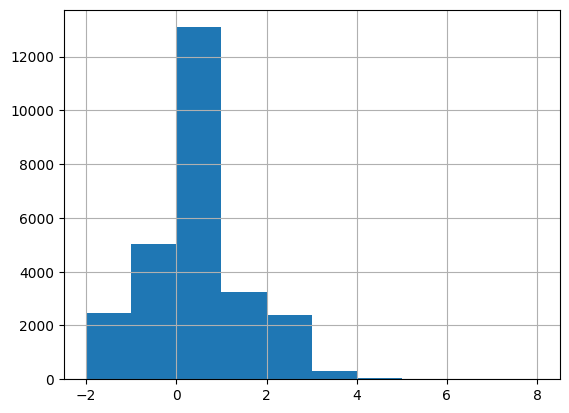

In [108]:
df[pay_feats[0]].hist() # Visualzing PAY_1

In [109]:
pay_1_bins = np.array(range(-2,10)) - 0.5
pay_1_bins

array([-2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,
        8.5])

Text(0, 0.5, 'Number of accounts')

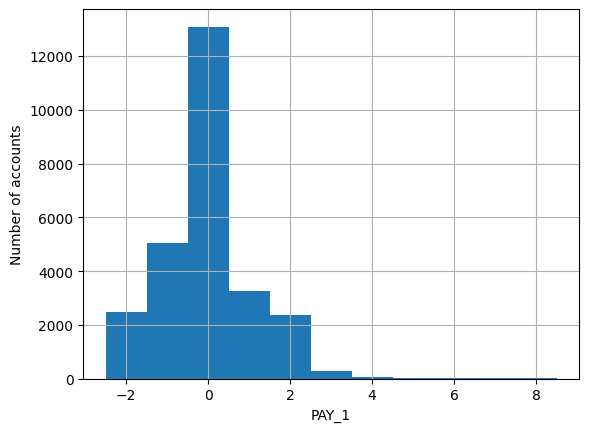

In [110]:
df[pay_feats[0]].hist(bins=pay_1_bins)
plt.xlabel('PAY_1')
plt.ylabel('Number of accounts')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

array([[<AxesSubplot: title={'center': 'PAY_1'}>,
        <AxesSubplot: title={'center': 'PAY_2'}>,
        <AxesSubplot: title={'center': 'PAY_3'}>],
       [<AxesSubplot: title={'center': 'PAY_4'}>,
        <AxesSubplot: title={'center': 'PAY_5'}>,
        <AxesSubplot: title={'center': 'PAY_6'}>]], dtype=object)

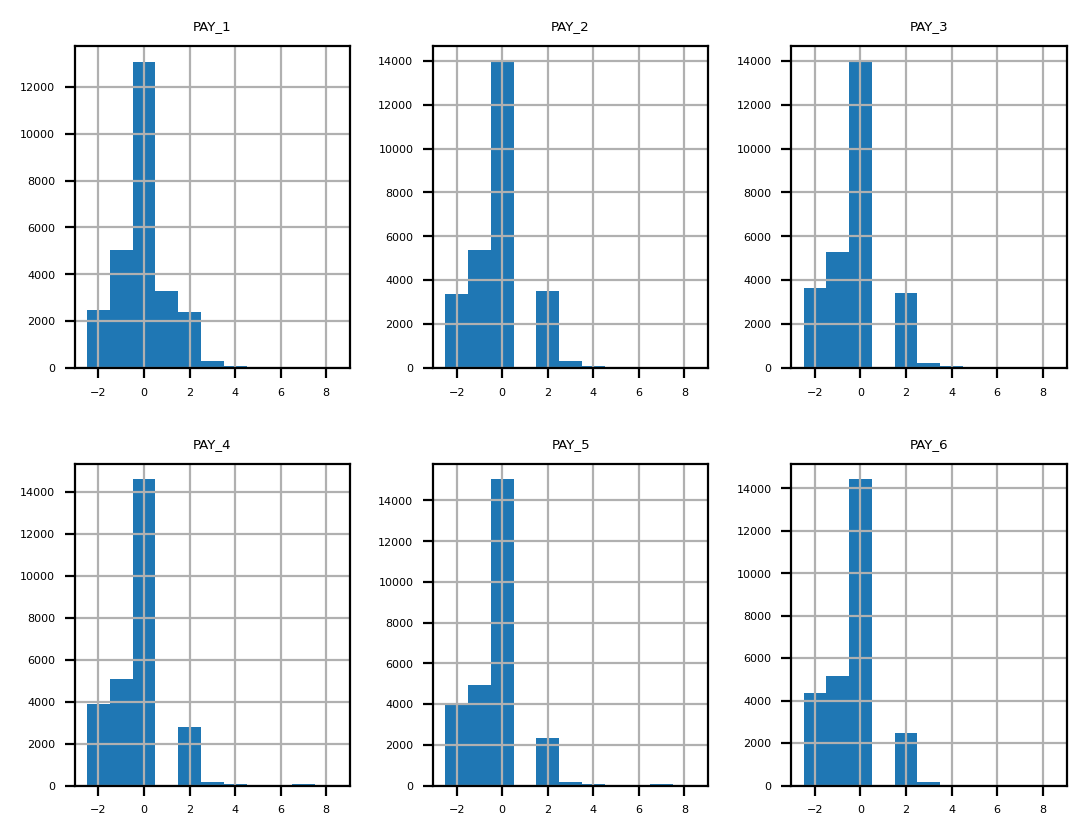

In [111]:
mpl.rcParams['font.size'] = 4
mpl.rcParams['figure.dpi'] = 200
df[pay_feats].hist(bins=pay_1_bins, layout = (2, 3))

In [112]:
df.loc[df['PAY_2']==2, ['PAY_2', 'PAY_3']].head(15)

,PAY_2,PAY_3
0,2,-1
1,2,0
13,2,2
15,2,0
47,2,2
50,2,0
57,2,2
61,2,2
82,2,0
83,2,2


In [65]:
df['PAY_1'].value_counts().sort_index()

-2     2476
-1     5047
 0    13087
 1     3261
 2     2378
 3      292
 4       63
 5       23
 6       11
 7        9
 8       17
Name: PAY_1, dtype: int64

In [66]:
df['PAY_2'].value_counts().sort_index()

-2     3375
-1     5368
 0    13961
 1       24
 2     3509
 3      289
 4       85
 5       24
 6       11
 7       17
 8        1
Name: PAY_2, dtype: int64

### Same procedure for remaining financial features
#### Bill AMT

In [67]:
bill_amt_feats = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

In [68]:
df[bill_amt_feats].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,51405.730723,49300.001500,47026.340047,43338.894539,40338.136701,38889.872337
std,73633.687106,70934.549534,68705.359524,64275.250740,60705.944083,59432.541657
min,-165580.000000,-69777.000000,-157264.000000,-170000.000000,-81334.000000,-339603.000000
25%,3580.000000,2999.750000,2627.250000,2341.750000,1745.000000,1256.000000
50%,22361.000000,21150.000000,20079.500000,19037.000000,18066.000000,17005.000000
75%,67649.750000,64395.500000,60360.000000,54727.500000,50290.500000,49253.750000
max,746814.000000,671563.000000,855086.000000,706864.000000,823540.000000,699944.000000


In [69]:
df[bill_amt_feats].head(10)

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
0,3913,3102,689,0,0,0
1,2682,1725,2682,3272,3455,3261
2,29239,14027,13559,14331,14948,15549
3,46990,48233,49291,28314,28959,29547
4,8617,5670,35835,20940,19146,19131
5,64400,57069,57608,19394,19619,20024
6,367965,412023,445007,542653,483003,473944
7,11876,380,601,221,-159,567
8,11285,14096,12108,12211,11793,3719
9,0,0,0,0,13007,13912


array([[<AxesSubplot:title={'center':'BILL_AMT1'}>,
        <AxesSubplot:title={'center':'BILL_AMT2'}>,
        <AxesSubplot:title={'center':'BILL_AMT3'}>],
       [<AxesSubplot:title={'center':'BILL_AMT4'}>,
        <AxesSubplot:title={'center':'BILL_AMT5'}>,
        <AxesSubplot:title={'center':'BILL_AMT6'}>]], dtype=object)

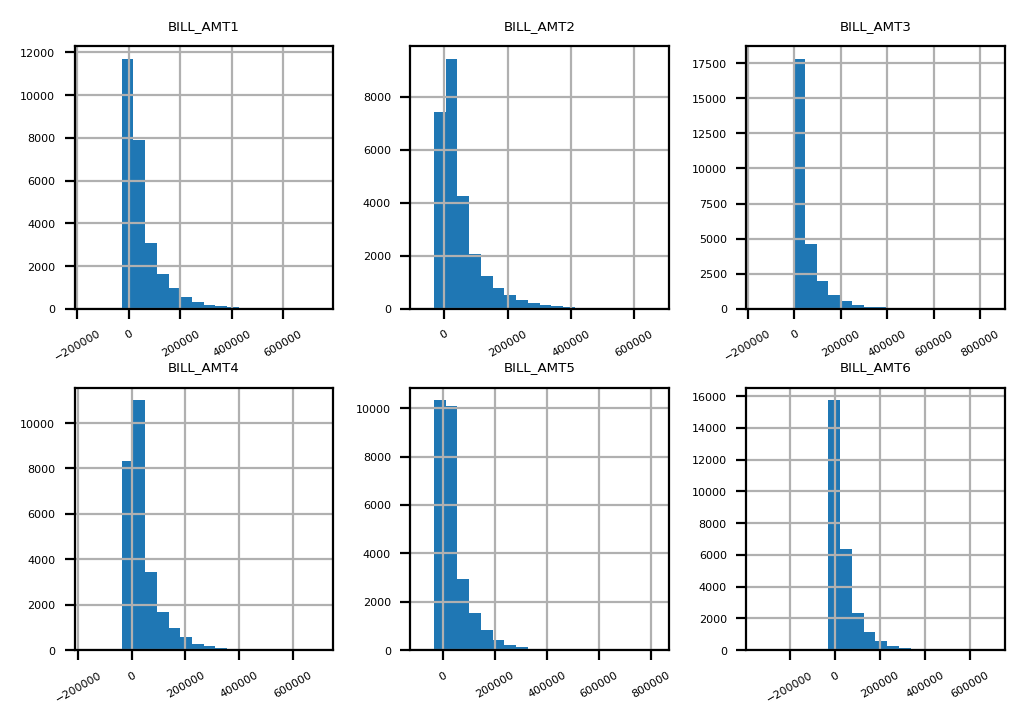

In [70]:
df[bill_amt_feats].hist(layout = (2, 3), xrot = 30, bins = 20)

#### PAY AMT

In [71]:
pay_amt_feats = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [72]:
df[pay_amt_feats].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,26664.000000,2.666400e+04,26664.000000,26664.000000,26664.000000,26664.000000
mean,5704.085771,5.881110e+03,5259.514964,4887.048717,4843.729973,5257.843047
std,16699.398632,2.121431e+04,17265.439561,15956.349371,15311.721795,17635.468185
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1000.000000,8.020000e+02,390.000000,294.750000,242.750000,111.000000
50%,2114.500000,2.007000e+03,1822.000000,1500.000000,1500.000000,1500.000000
75%,5027.000000,5.000000e+03,4556.250000,4050.500000,4082.750000,4015.000000
max,873552.000000,1.227082e+06,889043.000000,621000.000000,426529.000000,528666.000000


In [73]:
df[pay_amt_feats[0]].value_counts()

0        4656
2000     1194
3000      779
5000      610
1500      461
         ... 
7785        1
10121       1
3498        1
10752       1
85900       1
Name: PAY_AMT1, Length: 7425, dtype: int64

array([[<AxesSubplot:title={'center':'PAY_AMT1'}>,
        <AxesSubplot:title={'center':'PAY_AMT2'}>,
        <AxesSubplot:title={'center':'PAY_AMT3'}>],
       [<AxesSubplot:title={'center':'PAY_AMT4'}>,
        <AxesSubplot:title={'center':'PAY_AMT5'}>,
        <AxesSubplot:title={'center':'PAY_AMT6'}>]], dtype=object)

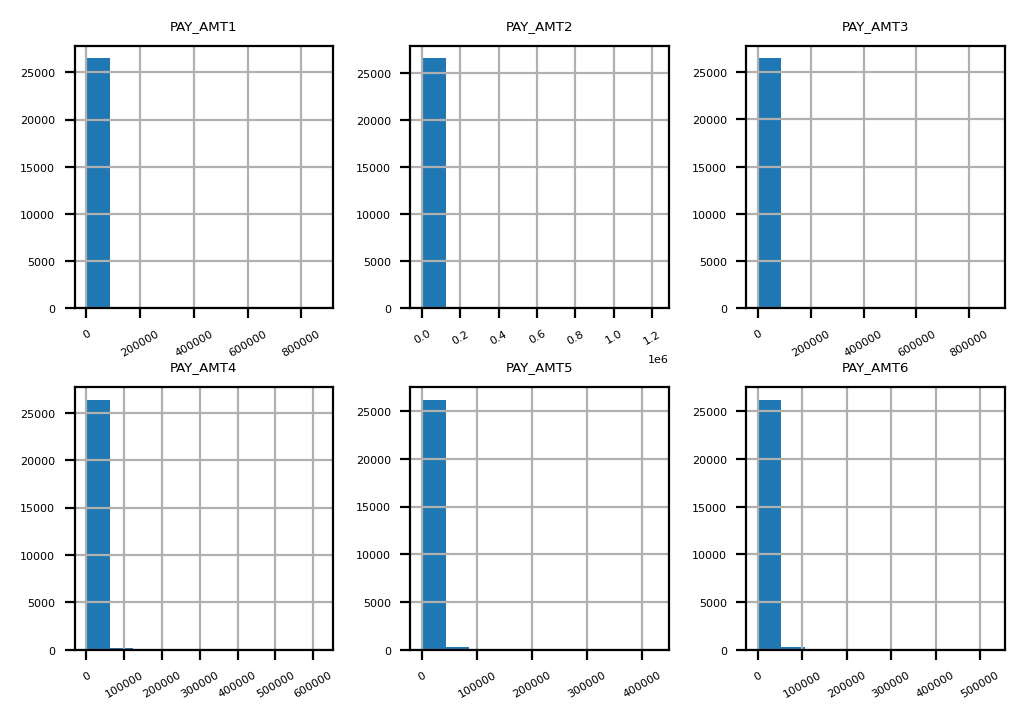

In [74]:
df[pay_amt_feats].hist(layout = (2, 3), xrot = 30)

In [75]:
df['PAY_AMT2'].head(20)

0       689
1      1000
2      1500
3      2019
4     36681
5      1815
6     40000
7       601
8         0
9         0
10       12
11     9966
12     6500
13        0
14     3000
15     1500
16        0
17        0
18        0
19     1537
Name: PAY_AMT2, dtype: int64

In [76]:
zero_pay_amt_mask = df[pay_amt_feats] == 0
zero_pay_amt_mask.head()
#df_pay_amt_non_zero 

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,True,False,True,True,True,True
1,True,False,False,False,True,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False


In [77]:
zero_pay = zero_pay_amt_mask.sum()
zero_pay

PAY_AMT1    4656
PAY_AMT2    4833
PAY_AMT3    5293
PAY_AMT4    5697
PAY_AMT5    5981
PAY_AMT6    6373
dtype: int64

In [78]:
#df_pay_amt_adj = df[pay_amt_feats].applymap(math.log10)
#df_pay_amt_adj = np.log10(df[pay_amt_feats])
#df_clean_2 = df_clean_1.loc[valid_pay_1_mask, :].copy()
#df_pay_amt_mapped = df.loc[zero_pay_amt_mask, :].copy

In [79]:
#df_pay_amt_mapped = df[pay_amt_feats].loc[zero_pay_amt_mask, :].copy
#df_clean_1 = df_one.loc[~feature_zero_mask, :].copy()
test_df = np.log(df[pay_amt_feats].replace(0, np.nan))
test_df.head(10)

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,NaN,6.535241,NaN,NaN,NaN,NaN
1,NaN,6.907755,6.907755,6.907755,NaN,7.600902
2,7.325149,7.313220,6.907755,6.907755,6.907755,8.517193
3,7.600902,7.610358,7.090077,7.003065,6.974479,6.907755
4,7.600902,10.510014,9.210340,9.104980,6.535241,6.520621
5,7.824046,7.503841,6.487684,6.907755,6.907755,6.684612
6,10.915088,10.596635,10.545341,9.915367,9.528794,9.530248
7,5.940171,6.398595,NaN,6.364751,7.430707,7.340836
8,8.110427,NaN,6.068426,6.907755,6.907755,6.907755
9,NaN,NaN,NaN,9.473243,7.022868,NaN


In [80]:
df_pay_amt_log10 = test_df.replace(np.nan, 0)
df_pay_amt_log10

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0.000000,6.535241,0.000000,0.000000,0.000000,0.000000
1,0.000000,6.907755,6.907755,6.907755,0.000000,7.600902
2,7.325149,7.313220,6.907755,6.907755,6.907755,8.517193
3,7.600902,7.610358,7.090077,7.003065,6.974479,6.907755
4,7.600902,10.510014,9.210340,9.104980,6.535241,6.520621
...,...,...,...,...,...,...
26659,9.047821,9.903488,8.517793,8.021913,8.517193,6.907755
26660,7.515889,8.167919,9.104758,4.859812,0.000000,0.000000
26661,0.000000,0.000000,9.998798,8.342840,7.600902,8.039157
26662,11.360939,8.134174,7.071573,7.563201,10.877368,7.497762


array([[<AxesSubplot:title={'center':'PAY_AMT1'}>,
        <AxesSubplot:title={'center':'PAY_AMT2'}>,
        <AxesSubplot:title={'center':'PAY_AMT3'}>],
       [<AxesSubplot:title={'center':'PAY_AMT4'}>,
        <AxesSubplot:title={'center':'PAY_AMT5'}>,
        <AxesSubplot:title={'center':'PAY_AMT6'}>]], dtype=object)

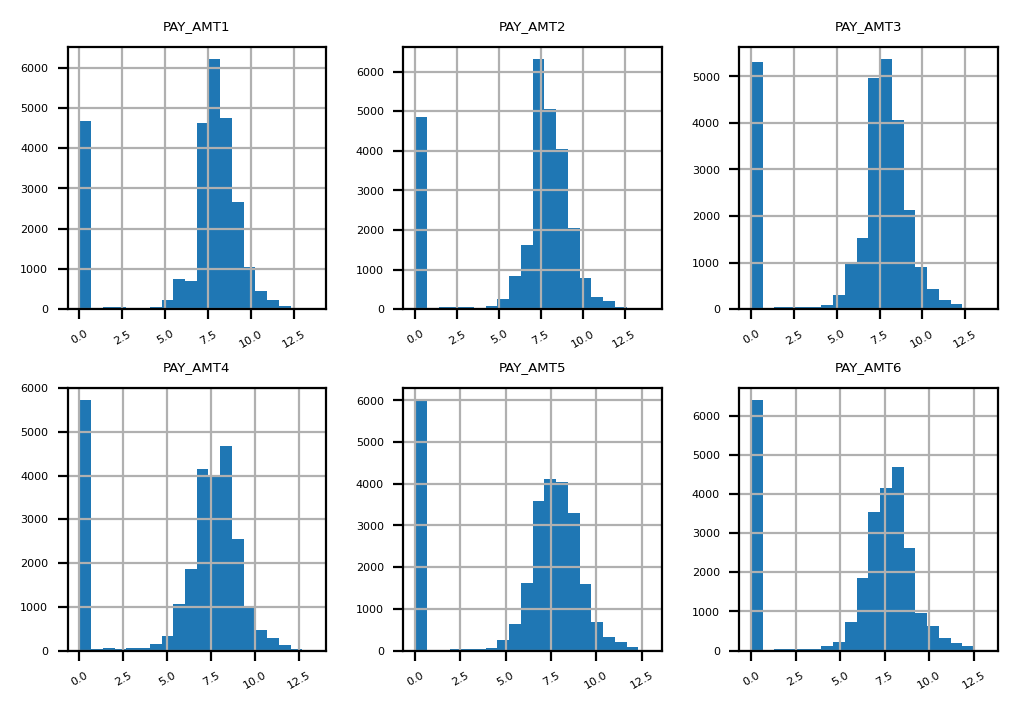

In [81]:
df_pay_amt_log10.hist(bins = 20, layout = (2, 3), xrot = 30)

#### Other solution

array([[<AxesSubplot:title={'center':'PAY_AMT1'}>,
        <AxesSubplot:title={'center':'PAY_AMT2'}>,
        <AxesSubplot:title={'center':'PAY_AMT3'}>],
       [<AxesSubplot:title={'center':'PAY_AMT4'}>,
        <AxesSubplot:title={'center':'PAY_AMT5'}>,
        <AxesSubplot:title={'center':'PAY_AMT6'}>]], dtype=object)

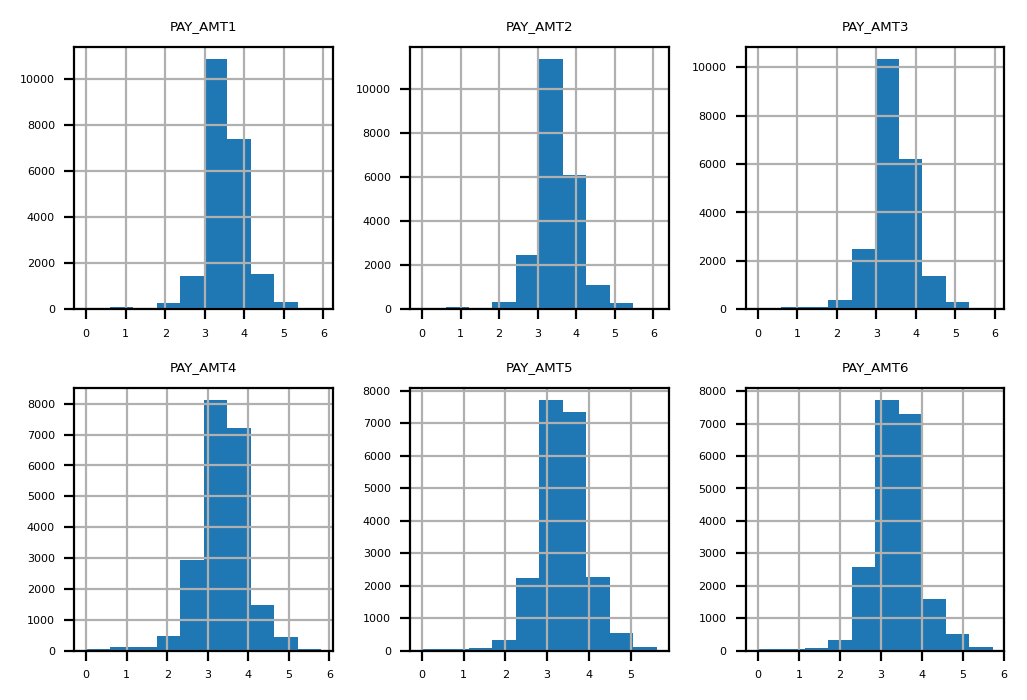

In [82]:
df[pay_amt_feats][~zero_pay_amt_mask].apply(np.log10).hist(layout=(2,3)) # This excludes zeroes using the '~' Not operator

### Testing something

In [83]:
# Test
import pandas as pd
import math
z = pd.DataFrame({'a':[4.0,5.0,6.0,7.0,8.0],'b':[6.0,0,5.0,0,1.0]})
z
#z.where(z['b'] != 0, z['a'] / z['b'].apply(lambda l: math.log(l)), 0)

,a,b
0,4.0,6.0
1,5.0,0.0
2,6.0,5.0
3,7.0,0.0
4,8.0,1.0


In [84]:
mask = (z['b'] != 0)
z_valid = z[mask]

z['c'] = 0
z.loc[mask, 'c'] = z_valid['a'] / np.log(z_valid['b'])

In [85]:
z

,a,b,c
0,4.0,6.0,2.232443
1,5.0,0.0,0.000000
2,6.0,5.0,3.728010
3,7.0,0.0,0.000000
4,8.0,1.0,inf


In [86]:
mask

0     True
1    False
2     True
3    False
4     True
Name: b, dtype: bool